# Making question

## Các thư viện cần thiết

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import time
import datetime
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings("ignore") # bỏ qua tất cả các cảnh báo
pd.set_option('display.max_columns', None) # hiển thị hết các cột

## Đọc dữ liệu từ các file csv đã được làm sạch và merge 2 dataFrame trên lại theo cột `Season` và `Team`

In [2]:
team_profile_df = pd.read_csv('team_profile.csv', delimiter='\t') # Use delimiter='\t' to handle tabs
team_ranking_df = pd.read_csv('team_rankings.csv')

team_profile_df.rename(columns={'Club': 'Team'}, inplace=True)

merged_df = pd.merge(team_ranking_df, team_profile_df, on=['Season', 'Team'], how='inner')
merged_df.head()

,Season,Team,Ranking,Wins,Draws,Losses,Goals Scored,Goals Conceded,Squad,Average age,Foreigners,Total market value
0,14/15,Chelsea FC,1,26,9,3,73,32,38.0,25.4,28.0,557.25
1,14/15,Manchester City,2,24,7,7,83,38,34.0,27.1,27.0,448.25
2,14/15,Arsenal FC,3,22,9,7,71,36,42.0,24.5,29.0,414.75
3,14/15,Manchester United,4,20,10,8,62,37,43.0,25.4,26.0,505.40
4,14/15,Tottenham Hotspur,5,19,7,12,58,53,42.0,25.2,25.0,304.15


Ta vẽ biểu đồ tương quan để xem xét rõ sự tương quan giữa các cột sau khi đã merge data của 2 file csv lại

Text(0.5, 1.0, 'Correlation Matrix of Merged DataFrame')

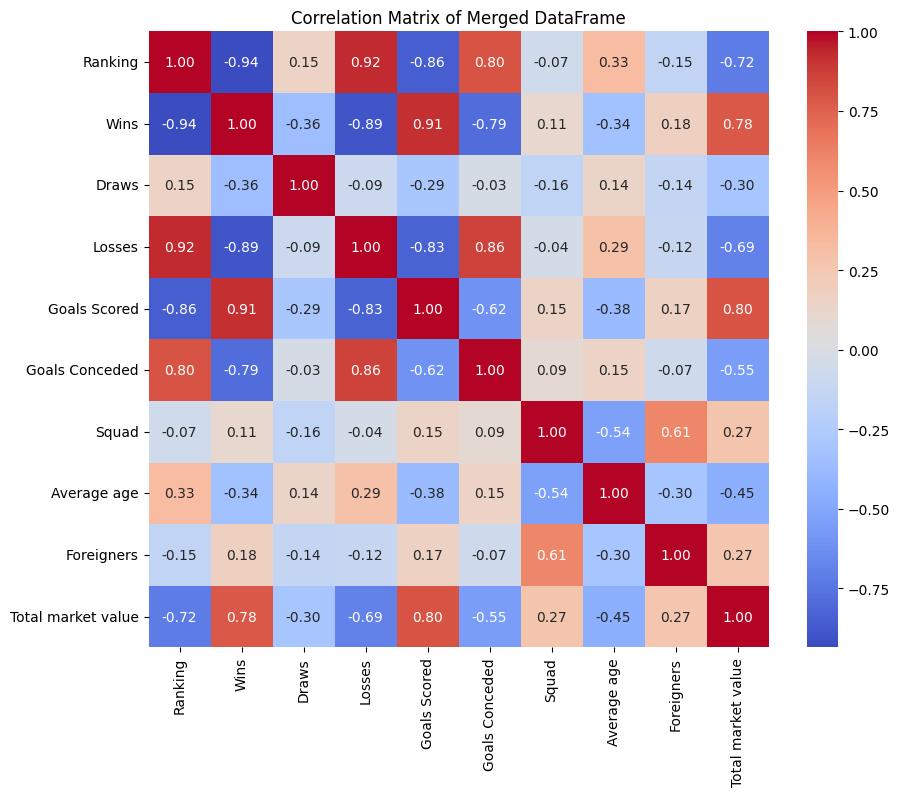

In [3]:
plt.figure(figsize=(10, 8))
correlation_matrix = merged_df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Merged DataFrame')

## Câu hỏi 1: Liệu đội có độ tuổi trung bình thấp thường có xếp hạng cao hơn không? Thống kê độ tuổi trung bình giữa các thứ hạng

**Ý nghĩa của câu hỏi:**  
Đội bóng có độ tuổi trung bình thấp thường có sự năng động, tốc độ và sức bền tốt hơn, điều này có thể ảnh hưởng đến hiệu suất thi đấu và kết quả trong mùa giải. Tuy nhiên, kinh nghiệm của cầu thủ lớn tuổi cũng có thể đóng vai trò quan trọng.

**Lợi ích khi trả lời câu hỏi**

Trả lời câu hỏi này giúp các câu lạc bộ tối ưu hóa chiến lược xây dựng đội hình, cân nhắc giữa năng lượng của cầu thủ trẻ và kinh nghiệm của cầu thủ lớn tuổi để đạt kết quả cao nhất.

Đầu tiên ta sẽ thống kê độ tuổi trung bình theo từng thứ hạng

In [4]:
average_age_by_rank = merged_df.groupby("Ranking")["Average age"].mean().reset_index()
average_age_by_rank_sorted = average_age_by_rank.sort_values(by="Ranking")
average_age_by_rank_sorted

,Ranking,Average age
0,1,25.37
1,2,25.21
2,3,25.15
3,4,25.53
4,5,25.27
5,6,25.13
6,7,25.59
7,8,25.38
8,9,26.41
9,10,26.13


Để rõ ràng hơn, ta sẽ vẽ biểu đồ cột độ tuổi trung bình gữa 20 thứ hạng để nhìn rõ hơn

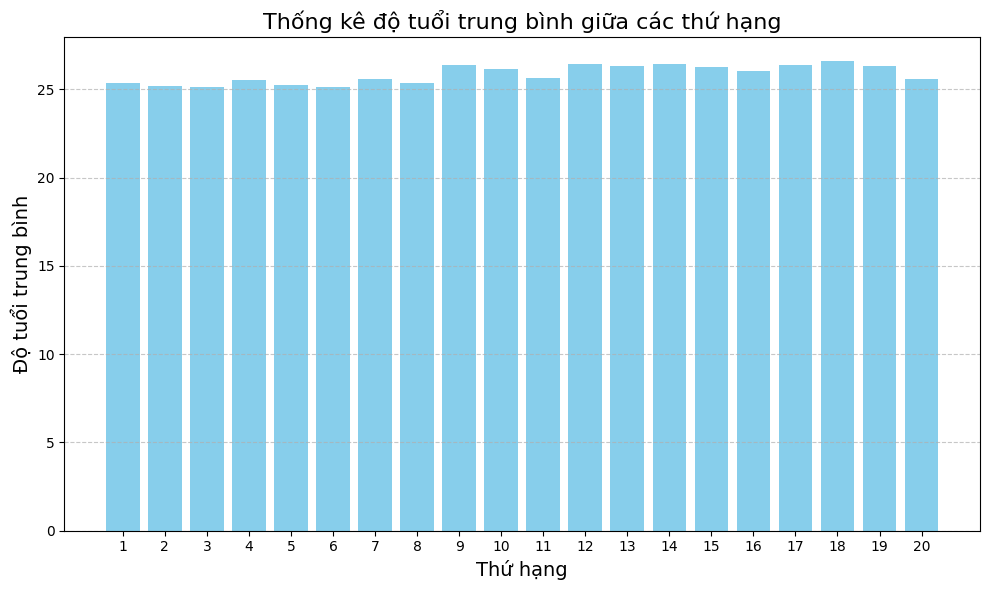

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(average_age_by_rank_sorted["Ranking"], average_age_by_rank_sorted["Average age"], color="skyblue")
plt.title("Thống kê độ tuổi trung bình giữa các thứ hạng", fontsize=16)
plt.xlabel("Thứ hạng", fontsize=14)
plt.ylabel("Độ tuổi trung bình", fontsize=14)
plt.xticks(average_age_by_rank_sorted["Ranking"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Nhận xét**
- Các đội có thứ hạng cao hơn (hạng 1-6) thường có độ tuổi trung bình thấp hơn (25.1-25.5). Điều này gợi ý rằng các đội có đội hình trẻ, năng động và thể lực tốt có xu hướng đạt thành tích cao hơn.
- Ngược lại, các đội có thứ hạng thấp hơn (hạng 9-20) có độ tuổi trung bình cao hơn (từ 26 tuổi trở lên). Điều này có thể phản ánh sự thiếu linh hoạt, tốc độ hoặc khả năng cạnh tranh.

- Đội hạng 1 (trung bình 25.37 tuổi) và hạng 2 (25.21 tuổi) có độ tuổi trung bình rất sát nhau, cho thấy sự cạnh tranh mạnh mẽ giữa các đội đầu bảng.

**Kết luận: Có một mối tương quan thuận giữa độ tuổi trung bình và thứ hạng: khi thứ hạng càng cao (đội xếp hạng thấp hơn trong bảng xếp hạng), độ tuổi trung bình càng cao. Tuy nhiên tương quan này lại không quá sâu sắc, do độ tuổi trung bình giữa các thứ hạng không quá chênh lệch**

## Câu hỏi 2: Nếu một đội có nhiều thành viên người nước ngoài thì có ảnh hưởng gì đến xếp hạng không? Thống kê số lượng người nước ngoài trung bình theo thứ hạng

**Ý nghĩa của câu hỏi:**  
Cầu thủ ngoại quốc mang lại sự đa dạng về kỹ năng, phong cách thi đấu và kinh nghiệm quốc tế. Tuy nhiên, khả năng hòa nhập của họ vào đội hình và văn hóa câu lạc bộ có thể ảnh hưởng đến hiệu quả thi đấu.

**Lợi ích khi trả lời câu hỏi:**

Phân tích này giúp các đội bóng đánh giá mức độ cần thiết khi chiêu mộ cầu thủ ngoại, cân nhắc chi phí chuyển nhượng với lợi ích tiềm năng về hiệu suất và kết quả.

Đầu tiên, ta thống kê số lượng người nước ngoài trung bình theo thứ hạng

In [6]:
foreigners_by_rank = merged_df.groupby("Ranking")["Foreigners"].mean().reset_index()
foreigners_by_rank_sorted = foreigners_by_rank.sort_values(by="Ranking")
foreigners_by_rank_sorted

,Ranking,Foreigners
0,1,26.8
1,2,25.5
2,3,27.4
3,4,23.4
4,5,25.9
5,6,24.4
6,7,23.2
7,8,25.6
8,9,22.8
9,10,24.5


Sau đó ta vẽ biểu đồ cột để trực quan hơn

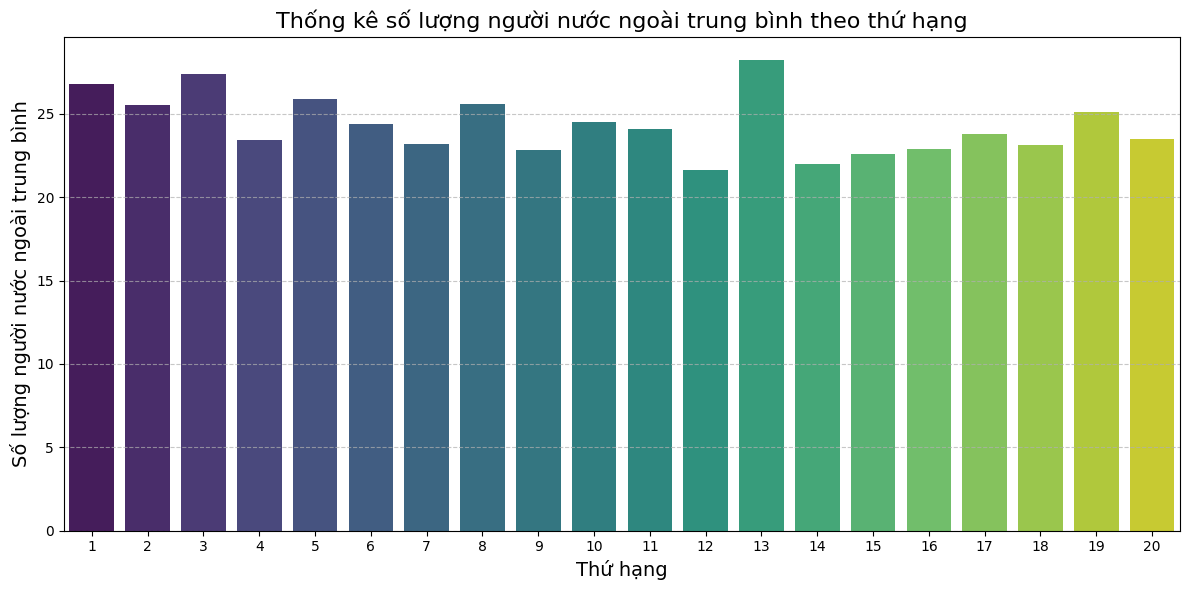

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=foreigners_by_rank_sorted["Ranking"],
    y=foreigners_by_rank_sorted["Foreigners"],
    palette="viridis"
)
plt.title("Thống kê số lượng người nước ngoài trung bình theo thứ hạng", fontsize=16)
plt.xlabel("Thứ hạng", fontsize=14)
plt.ylabel("Số lượng người nước ngoài trung bình", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Nhận xét**
- Các đội có thứ hạng cao hơn (1-5) có số lượng cầu thủ nước ngoài trung bình dao động từ 23.4 đến 27.4, với mức cao nhất ở hạng 3 (27.4 cầu thủ) và thấp hơn ở hạng 4 (23.4 cầu thủ).
- Đội ở các thứ hạng thấp hơn (12-20) thường có số lượng cầu thủ nước ngoài dao động trong khoảng 21.6 đến 25.1, cho thấy sự giảm nhẹ so với các đội top đầu.

- Đội hạng 1 có 26.8 cầu thủ nước ngoài trung bình, cho thấy sự ưu tiên cho cầu thủ ngoại trong việc xây dựng đội hình để duy trì vị thế hàng đầu.
- Đội hạng 13 có số lượng cầu thủ nước ngoài cao nhất (28.2), nhưng điều này không đảm bảo thứ hạng cao, cho thấy số lượng cầu thủ nước ngoài không phải là yếu tố duy nhất quyết định hiệu suất.
- Không có mối quan hệ rõ ràng giữa số lượng cầu thủ nước ngoài và thứ hạng. Ví dụ, một số đội có nhiều cầu thủ ngoại (hạng 3, 13) nhưng không phải lúc nào cũng đạt thứ hạng cao.

**Kết luận: Số lượng cầu thủ nước ngoài không phải là yếu tố quyết định duy nhất đến thứ hạng của đội bóng, tuy vẫn có ảnh hưởng đến thứ hạng nhưng sự ảnh hưởng này không quá sâu sắc. Tuy nhiên, các đội top đầu thường có số lượng cầu thủ nước ngoài cao, cho thấy tầm quan trọng của việc khai thác tài năng quốc tế trong việc cạnh tranh ở vị trí cao nhất**

## Câu hỏi 3: Các đội bóng có số trận thắng cao có đặc điểm gì về số bàn thắng và số bàn thua?

**Ý nghĩa của câu hỏi:**  
Mối quan hệ giữa số trận thắng và số bàn thắng, bàn thua giúp xác định tầm quan trọng của việc tấn công hiệu quả hoặc phòng ngự chắc chắn. Ví dụ, một đội thắng nhiều trận nhờ phòng ngự tốt có thể có số bàn thắng không quá cao.


**Lợi ích khi trả lời câu hỏi:**

Giúp các đội bóng điều chỉnh chiến thuật (tấn công hoặc phòng ngự) phù hợp với mục tiêu đạt thứ hạng cao.

Đầu tiên ta thống kê trung bình của Goals Scored và Goals Conceded theo số trận thắng

In [42]:
wins_stats = merged_df.groupby("Wins")[["Goals Scored", "Goals Conceded"]].mean().reset_index()
wins_stats

,Wins,Goals Scored,Goals Conceded
0,3,28.000000,85.333333
1,5,29.833333,69.833333
2,6,36.400000,72.000000
3,7,33.375000,63.125000
4,8,34.600000,60.200000
5,9,40.764706,64.235294
6,10,40.625000,60.875000
7,11,41.714286,57.428571
8,12,46.000000,56.523810
9,13,49.250000,59.083333


Sau đó, ta sẽ về biểu đồ đường để dễ quan sát hơn

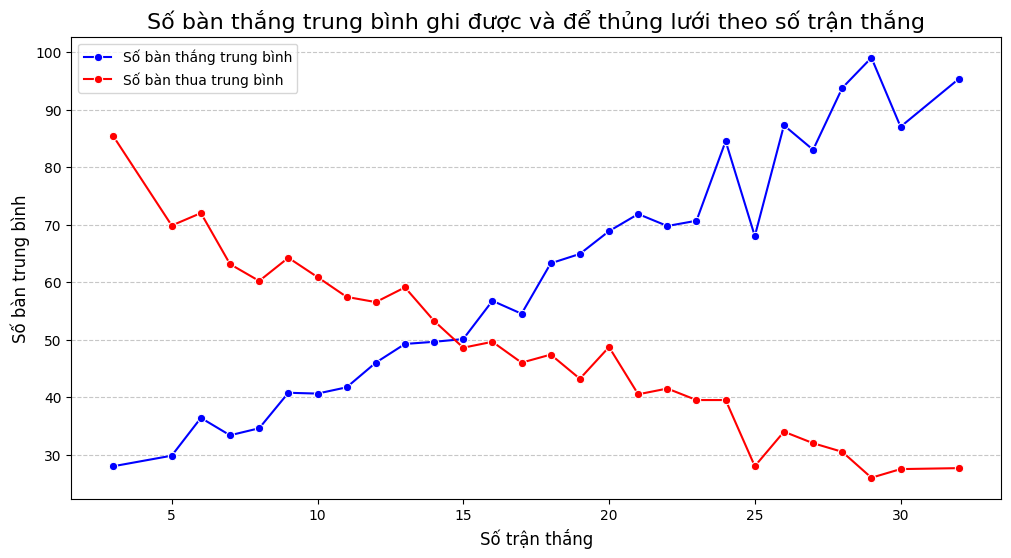

In [47]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=wins_stats, x="Wins", y="Goals Scored", label="Số bàn thắng trung bình", marker="o", color="blue") # Changed x to "Wins"
sns.lineplot(data=wins_stats, x="Wins", y="Goals Conceded", label="Số bàn thua trung bình", marker="o", color="red") # Changed x to "Wins"
plt.title("Số bàn thắng trung bình ghi được và để thủng lưới theo số trận thắng", fontsize=16)
plt.xlabel("Số trận thắng", fontsize=12)
plt.ylabel("Số bàn trung bình", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Nhận xét**
- Các đội có số trận thắng cao hơn (từ 15 trở lên) thường ghi được nhiều bàn thắng hơn và để thủng lưới ít hơn.
- Khi số trận thắng tăng lên, số bàn thắng trung bình cũng tăng đáng kể, trong khi số bàn thua giảm dần.

- Các đội có từ 26 trận thắng trở lên thường ghi trung bình hơn 87 bàn thắng và chỉ để thủng lưới khoảng 30 bàn. Đây là sự vượt trội về cả tấn công và phòng thủ.
- Đặc biệt, đội thắng 32 trận ghi tới 95.3 bàn thắng và chỉ để thủng lưới 27.7 bàn, cho thấy sự cân bằng xuất sắc.

- Các đội có từ 15-20 trận thắng ghi trung bình 50-70 bàn thắng, nhưng vẫn để thủng lưới khoảng 45-50 bàn. Điều này cho thấy sự thiếu ổn định trong phòng ngự so với các đội top đầu.

- Các đội thắng dưới 10 trận có số bàn thắng thấp, khoảng 28-40 bàn, nhưng số bàn thua cao, dao động từ 60-85 bàn. Điều này chỉ ra rằng các đội này gặp khó khăn trong cả tấn công lẫn phòng thủ.

**Kết luận: Có một mối quan hệ chặt chẽ giữa số trận thắng và hiệu suất ghi bàn, cũng như khả năng phòng ngự.Các đội thắng nhiều trận thường ghi được số lượng bàn thắng lớn, thể hiện sức mạnh tấn công và giữ số bàn thua thấp, cho thấy sự chắc chắn trong phòng ngự.**

## Câu hỏi 4: Liệu một đội có số trận thắng cao, số trận thua ít thì có xếp hạng cao hơn không? Thống kê trung bình số trận thắng - thua - hoà giữa các thứ hạng.

**Ý nghĩa của câu hỏi:**  
Hiểu rõ sự khác biệt về hiệu suất thi đấu giữa các đội có thứ hạng cao và thấp, cụ thể là số trận thắng, hòa và thua trung bình. Điều này giúp làm sáng tỏ yếu tố nào quan trọng nhất để đạt thứ hạng cao.


**Lợi ích khi trả lời câu hỏi:**

Hỗ trợ các đội xác định mục tiêu cụ thể, chẳng hạn như tối thiểu hóa số trận thua hoặc tăng số trận thắng để cải thiện thứ hạng.

Đầu tiên, ta thống kê trung bình wins-draws-losses theo thứ hạng

In [44]:
rank_stats = merged_df.groupby("Ranking")[["Wins", "Draws", "Losses"]].mean().reset_index()
rank_stats

,Ranking,Wins,Draws,Losses
0,1,28.7,5.6,3.7
1,2,25.4,7.2,5.4
2,3,21.4,9.6,7.0
3,4,20.5,8.6,8.9
4,5,20.2,6.9,10.9
5,6,17.9,9.3,10.8
6,7,16.6,9.4,12.0
7,8,15.4,9.2,13.4
8,9,14.1,10.2,13.7
9,10,13.9,8.7,15.4


Vẽ biểu đồ cột để xem xét sự tương quan giữa các chỉ số và thứ hạng

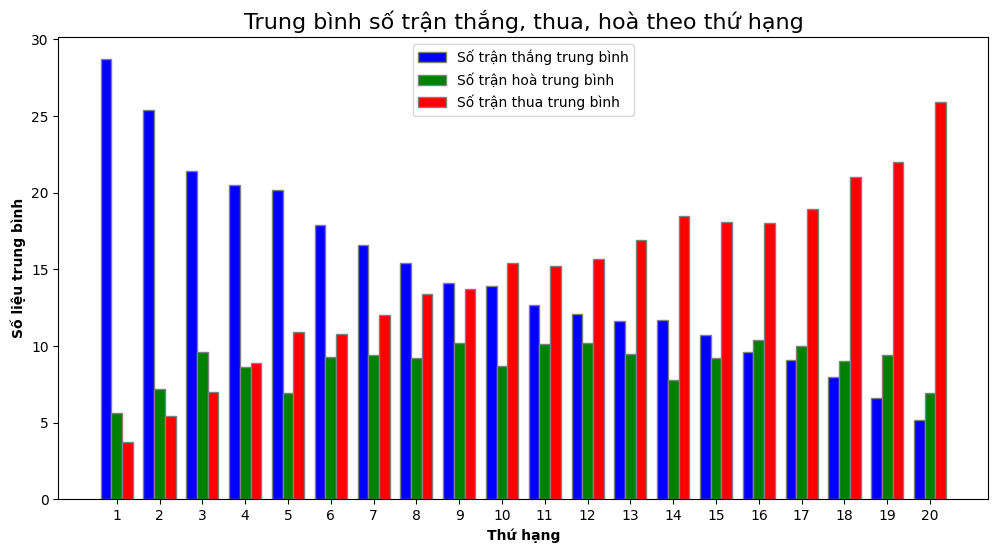

In [48]:
barWidth = 0.25

r1 = np.arange(len(rank_stats["Wins"]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(12, 6))
plt.bar(r1, rank_stats["Wins"], color="blue", width=barWidth, edgecolor="grey", label="Số trận thắng trung bình")
plt.bar(r2, rank_stats["Draws"], color="green", width=barWidth, edgecolor="grey", label="Số trận hoà trung bình")
plt.bar(r3, rank_stats["Losses"], color="red", width=barWidth, edgecolor="grey", label="Số trận thua trung bình")

plt.xlabel("Thứ hạng", fontweight="bold")
plt.ylabel("Số liệu trung bình", fontweight="bold")
plt.xticks([r + barWidth for r in range(len(rank_stats["Wins"]))], rank_stats["Ranking"])
plt.title("Trung bình số trận thắng, thua, hoà theo thứ hạng", fontsize=16)
plt.legend()
plt.show()

**Nhận xét**
- Nhìn chung, các đội có Ranking cao (vị trí đầu bảng) có số trận thắng (Wins) cao hơn, số trận hòa (Draws) và thua (Losses) ít hơn.
- Các đội có Ranking thấp (vị trí cuối bảng) có số trận thắng thấp hơn, số trận hòa và thua cao hơn. Điều này cho thấy mối quan hệ trực tiếp giữa vị trí trong bảng xếp hạng và hiệu suất thi đấu.
- Từ vị trí 1 đến 20, ta thấy một sự suy giảm rõ rệt về số trận thắng. Ví dụ, đội xếp hạng 1 có 28.7 trận thắng, trong khi đội xếp hạng 20 chỉ có 5.2 trận thắng.
- Số trận thua của các đội cũng tăng dần theo thứ hạng, từ 3.7 trận thua ở đội xếp hạng 1 lên tới 25.9 trận thua ở đội xếp hạng 20.

- Số trận hòa của các đội có sự dao động nhỏ, với đội đứng hạng cao nhất có 5.6 trận hòa, trong khi đội xếp hạng 20 có 6.9 trận hòa. Tuy nhiên, các đội ở vị trí giữa bảng xếp hạng có số trận hòa khá ổn định và gần như không có sự chênh lệch quá lớn.

**Kết luận: số trận thắng - thua - hoà thật sự có 1 ảnh hưởng rất sâu sắc đến thứ hạng cuối cùng của mùa giải**


## Câu hỏi 5: Liệu các đội bóng qua các mùa giải có sự thay đổi/ tiến triển gì không (tạo thêm cột Total Points) và số liệu Total Points này có tương quan như thế nào với xếp hạng cuối cùng, từ đó thấy được sự cạnh tranh giữa các đội bóng

**Ý nghĩa của câu hỏi**

Việc phân tích sự thay đổi của các đội bóng qua các mùa giải giúp đánh giá liệu đội bóng có đang cải thiện thành tích hay không. Điều này có thể thể hiện qua việc gia tăng số trận thắng, giảm số trận thua, hoặc tăng tổng điểm qua các năm.


Phân tích sự thay đổi có thể giúp nhận diện các yếu tố tác động đến thành tích của đội, chẳng hạn như thay đổi huấn luyện viên, chuyển nhượng cầu thủ, chiến thuật mới, hay sự thay đổi trong đội hình thi đấu.

**Lợi ích khi trả lời câu hỏi**

Phân tích sự thay đổi qua các mùa giải giúp đánh giá hiệu quả của các chiến lược quản lý, huấn luyện, và các quyết định về chuyển nhượng. Nếu đội bóng cải thiện qua các năm, có thể kết luận rằng các chiến lược và quyết định đúng đắn đã được thực hiện.

**Preprocess**

Với câu hỏi này, ta sẽ tính toán thêm tổng điểm của một đội sẽ được tính như sau:

**Tổng điểm ( Total Points ) = 3 x Wins + 1 x Draws + 0 x Losses**

Trong đó:
- Mỗi trận thắng được tính 3 điểm.
- Mỗi trận hòa được tính 1 điểm.
- Mỗi trận thua không tính điểm (0 điểm).
Dựa trên công thức này, số trận thắng (Wins) có ảnh hưởng lớn nhất đến tổng điểm, vì mỗi trận thắng mang lại 3 điểm. Số trận hòa (Draws) cũng đóng góp vào tổng điểm nhưng ít hơn, chỉ 1 điểm cho mỗi trận hòa. Còn số trận thua (Losses) không có ảnh hưởng đến tổng điểm, vì không tính điểm cho các trận thua.


In [49]:
merged_df['Total_Points'] = 3 * merged_df['Wins'] + 0 * merged_df['Losses'] + 1 * merged_df['Draws']
merged_df.head()

,Season,Team,Ranking,Wins,Draws,Losses,Goals Scored,Goals Conceded,Squad,Average age,Foreigners,Total market value,Total_Points
0,14/15,Chelsea FC,1,26,9,3,73,32,38.0,25.4,28.0,557.25,87
1,14/15,Manchester City,2,24,7,7,83,38,34.0,27.1,27.0,448.25,79
2,14/15,Arsenal FC,3,22,9,7,71,36,42.0,24.5,29.0,414.75,75
3,14/15,Manchester United,4,20,10,8,62,37,43.0,25.4,26.0,505.40,70
4,14/15,Tottenham Hotspur,5,19,7,12,58,53,42.0,25.2,25.0,304.15,64


### 5.1  Liệu các đội bóng qua các mùa giải có sự thay đổi/ tiến triển gì không, từ đó thấy được sự canh tranh giữa các đội bóng

Sort theo Season

In [50]:
team_points_by_season = merged_df.groupby(['Season', 'Team'])['Total_Points'].sum().reset_index()
team_points_by_season

,Season,Team,Total_Points
0,14/15,Arsenal FC,75
1,14/15,Aston Villa,38
2,14/15,Burnley FC,33
3,14/15,Chelsea FC,87
4,14/15,Crystal Palace,48
...,...,...,...
195,23/24,Nottingham Forest,36
196,23/24,Sheffield United,16
197,23/24,Tottenham Hotspur,66
198,23/24,West Ham United,52


Sort theo tên đội

In [52]:
team_points_by_name = merged_df.groupby(['Team', 'Season'])['Total_Points'].sum().reset_index()
team_points_by_name

,Team,Season,Total_Points
0,AFC Bournemouth,15/16,42
1,AFC Bournemouth,16/17,46
2,AFC Bournemouth,17/18,44
3,AFC Bournemouth,18/19,45
4,AFC Bournemouth,19/20,34
...,...,...,...
195,Wolverhampton Wanderers,19/20,59
196,Wolverhampton Wanderers,20/21,45
197,Wolverhampton Wanderers,21/22,51
198,Wolverhampton Wanderers,22/23,41


Trực quan hoá

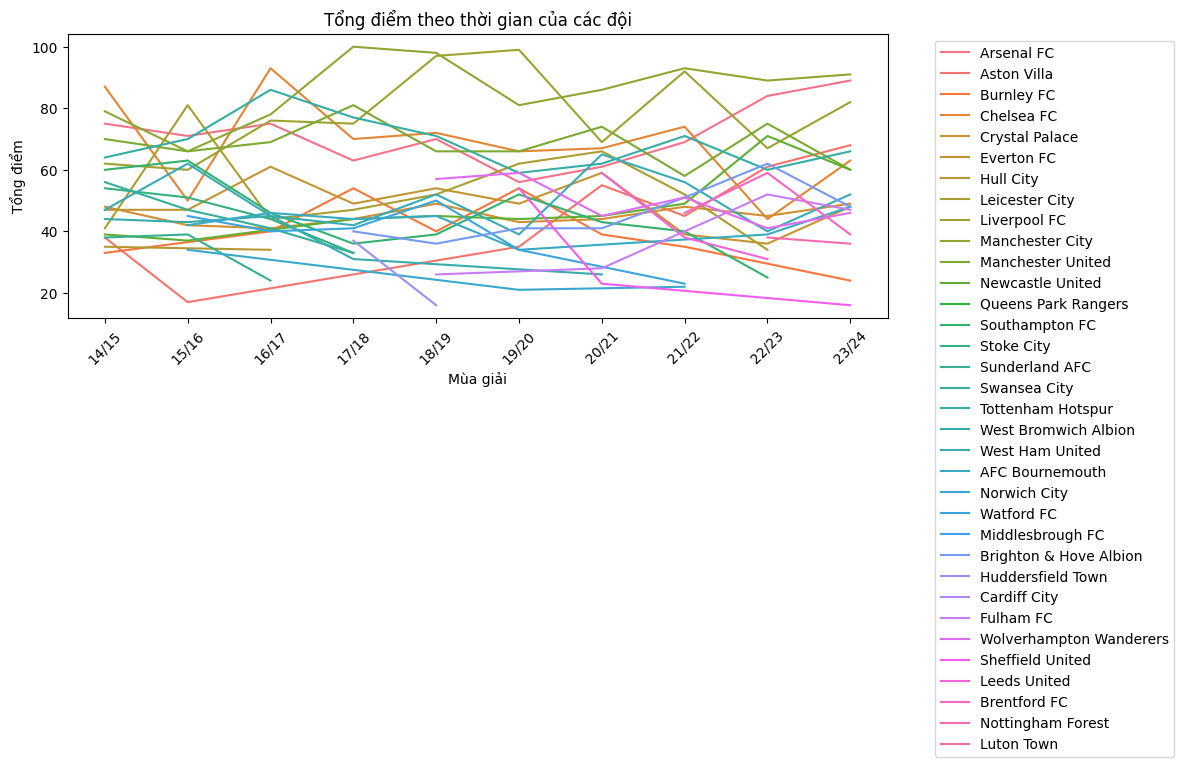

In [53]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=team_points_by_season, x='Season', y='Total_Points', hue='Team')
plt.title('Tổng điểm theo thời gian của các đội')
plt.xlabel('Mùa giải')
plt.ylabel('Tổng điểm')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Nhận xét**
- Manchester City: Là đội có số điểm cao ổn định và thường xuyên đứng đầu, đặc biệt từ mùa 17/18 đến 23/24.
- Liverpool: Có sự cải thiện rõ rệt từ mùa 17/18, đạt đỉnh điểm trong mùa giải 19/20 khi họ vô địch EPL.
- Arsenal và Tottenham Hotspur: Mặc dù không đạt đỉnh như Manchester City hay Liverpool, các đội này thường xuyên nằm trong nhóm điểm cao.
- Một số đội bóng mới thăng hạng và duy trì sự hiện diện gần đây, như Brentford, Nottingham Forest, và Luton Town.
Điểm của những đội này thường không cao trong mùa đầu tiên, nhưng Brentford có xu hướng cải thiện qua các mùa giải gần đây.

Để công bằng và đánh giá chính xác, chúng ta sẽ lọc ra các đội bóng thi đấu đủ 10 mùa giải để xem xu hướng điểm số của các đội này. Các đội bóng còn lại sẽ không được xem xét.

In [55]:
dfo = merged_df.copy()

initial_team_count = dfo['Team'].nunique()
print('Số lượng đội ban đầu:', initial_team_count)

teams_with_10_years = dfo.groupby('Team')['Season'].nunique().reset_index()
teams_with_10_years = teams_with_10_years[teams_with_10_years['Season'] == 10]
team_10_year_count = teams_with_10_years['Team'].nunique()
print('Số lượng đội thi đấu đủ 10 mùa giải:', team_10_year_count)

dfo = dfo[dfo['Team'].isin(teams_with_10_years['Team'])]

Số lượng đội ban đầu: 34
Số lượng đội thi đấu đủ 10 mùa giải: 9


In [60]:
dfo = dfo.groupby(['Team', 'Season'])['Total_Points'].sum().reset_index()
dfo.head(20)

,Team,Season,Total_Points
0,Arsenal FC,14/15,75
1,Arsenal FC,15/16,71
2,Arsenal FC,16/17,75
3,Arsenal FC,17/18,63
4,Arsenal FC,18/19,70
5,Arsenal FC,19/20,56
6,Arsenal FC,20/21,61
7,Arsenal FC,21/22,69
8,Arsenal FC,22/23,84
9,Arsenal FC,23/24,89


Trực quan hoá biểu đồ thời gian của 9 đội này

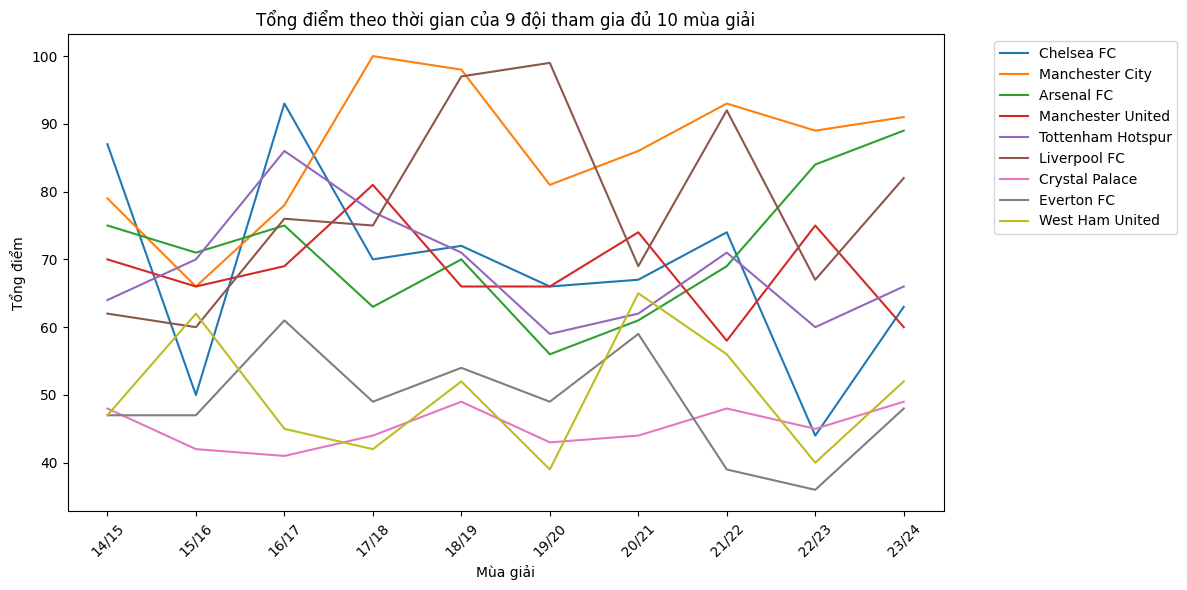

In [56]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfo, x='Season', y='Total_Points', hue='Team') # Changed data to dfo
plt.title('Tổng điểm theo thời gian của 9 đội tham gia đủ 10 mùa giải')
plt.xlabel('Mùa giải')
plt.ylabel('Tổng điểm')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Dựa vào biểu đồ trên, ta thấy có một số đội có điểm số khá ổn định nhưng cũng có một số đội điểm số biến thiên rất nhiều. Vì vậy ta tiến hành tính toán xu hướng các đội có điểm số tăng hoặc giảm và điểm số biến thiên nhiều hay ít.

Ở đây, để đơn giản, đội có xu hướng tăng điểm sẽ là đội có số lần tăng điểm nhiều hơn số lần giảm điểm. Ngược lại, đội có xu hướng giảm điểm sẽ là đội có số lần giảm điểm nhiều hơn số lần tăng điểm. Cùng lúc đó, ta sẽ tính thêm điểm số lớn nhất, nhỏ nhất, trung bình và độ lệch chuẩn của từng đội trong các mùa giải.

In [57]:
dfo['trend'] = 0

for team in dfo['Team'].unique():
    team_data = dfo[dfo['Team'] == team].sort_values(by='Season')
    team_data['trend'] = team_data['Total_Points'].diff().apply(lambda x: 1 if x > 0 else -1 if x < 0 else 0)
    dfo.loc[dfo['Team'] == team, 'trend'] = team_data['trend']

teams_trend = dfo.groupby(['Team']).agg({'trend': 'sum', 'Total_Points': ['max', 'min', 'mean', 'std']}).reset_index()
teams_trend.columns = ['Team', 'trend_sum', 'pts_max', 'pts_min', 'pts_mean', 'pts_std']
teams_trend

,Team,trend_sum,pts_max,pts_min,pts_mean,pts_std
0,Arsenal FC,3,89,56,71.3,10.100055
1,Chelsea FC,1,93,44,68.6,14.788885
2,Crystal Palace,1,49,41,45.3,2.983287
3,Everton FC,0,61,36,48.9,7.795298
4,Liverpool FC,1,99,60,77.9,14.177055
5,Manchester City,1,100,66,86.1,10.332796
6,Manchester United,0,81,58,68.5,6.932211
7,Tottenham Hotspur,1,86,59,68.6,8.329332
8,West Ham United,-1,65,39,50.0,9.018500


Sau khi đã tính toán xong, ta sẽ lọc ra các đội có xu hướng tăng điểm số tăng/giảm.

In [62]:
teams_trend_asc = teams_trend[teams_trend['trend_sum'] > 0]

print('Số lượng đội bóng có xu hướng tăng điểm số:', teams_trend_asc.shape[0])

Số lượng đội bóng có xu hướng tăng điểm số: 6


In [63]:
teams_trend_desc = teams_trend[teams_trend['trend_sum'] < 0]

print('Số lượng đội bóng có xu hướng giảm điểm số:', teams_trend_desc.shape[0])

Số lượng đội bóng có xu hướng giảm điểm số: 1


In [64]:
print('Số lượng đội bóng có độ biến thiên điểm số nhỏ:', teams_trend[teams_trend['pts_std'] < 5].shape[0])
print('Số lượng đội bóng có độ biến thiên điểm số vừa:', teams_trend[(teams_trend['pts_std'] >= 5) & (teams_trend['pts_std'] < 10)].shape[0])
print('Số lượng đội bóng có độ biến thiên điểm số lớn:', teams_trend[teams_trend['pts_std'] >= 10].shape[0])

Số lượng đội bóng có độ biến thiên điểm số nhỏ: 1
Số lượng đội bóng có độ biến thiên điểm số vừa: 4
Số lượng đội bóng có độ biến thiên điểm số lớn: 4


**Phân tích chung:**

*   **Số lượng đội tăng/giảm:** Có 6 đội có xu hướng tăng điểm và 1 đội có xu hướng giảm điểm trong 9 đội tham gia đủ 10 mùa giải. Điều này có thể cho thấy tính cạnh tranh cao của các giải đấu, khi việc duy trì hoặc cải thiện thành tích của các đội này rất khả quan.
*   **Độ biến thiên điểm số:** Nhìn chung, điểm số của các đội bóng có sự biến thiên vừa phải. Phân loại cụ thể: 1 đội biến thiên nhỏ, 4 đội biến thiên vừa và 4 đội biến thiên lớn. Điều này cho thấy sự bất ổn định trong phong độ của các đội bóng qua các mùa giải, thể hiện rõ tính cạnh tranh và khó đoán của các giải đấu.

**Nhận xét**

- Manchester City: Thể hiện sự ổn định và tăng trưởng tốt, liên tục giữ điểm số cao qua các mùa giải, đặc biệt là từ mùa 17/18 trở đi.
- Liverpool FC: Có xu hướng tăng trưởng mạnh ở giai đoạn giữa, nhưng giảm nhẹ ở những mùa giải gần đây.

- Chelsea FC và Manchester United: Điểm số biến động mạnh, thể hiện sự thiếu ổn định qua các mùa giải.
- Tottenham Hotspur: Xu hướng không đồng nhất, thường duy trì ở mức trung bình nhưng không có sự đột phá rõ ràng.

- Crystal Palace, Everton FC, West Ham United: Điểm số thấp hơn đáng kể so với nhóm dẫn đầu và ít thay đổi, thể hiện vị trí ổn định ở nhóm dưới.




### 5.2 Số liệu Total Points này có tương quan như thế nào với xếp hạng cuối cùng?

Tương quan giữa Totals Points và Ranking

In [67]:
correlation = merged_df[['Total_Points', 'Ranking']].corr()
correlation

,Total_Points,Ranking
Total_Points,1.000000,-0.954271
Ranking,-0.954271,1.000000


**Tương quan -0.95 cho thấy mối quan hệ giữa thứ hạng và tổng điểm là rất mạnh mẽ và tương quan nghịch, nghĩa là khi thứ hạng càng thấp, tổng điểm càng thấp. Đây là một mối quan hệ rất rõ ràng: các đội xếp hạng cao có tổng điểm cao và ngược lại, các đội xếp hạng thấp có tổng điểm thấp.**


Thống kê trung bình của tổng điểm theo thứ hạng

In [68]:
average_points_by_rank = merged_df.groupby("Ranking")["Total_Points"].mean().reset_index()
average_points_by_rank_sorted = average_points_by_rank.sort_values(by="Ranking")
average_points_by_rank_sorted

,Ranking,Total_Points
0,1,91.7
1,2,83.4
2,3,73.8
3,4,70.1
4,5,67.5
5,6,63.0
6,7,59.2
7,8,55.4
8,9,52.5
9,10,50.4


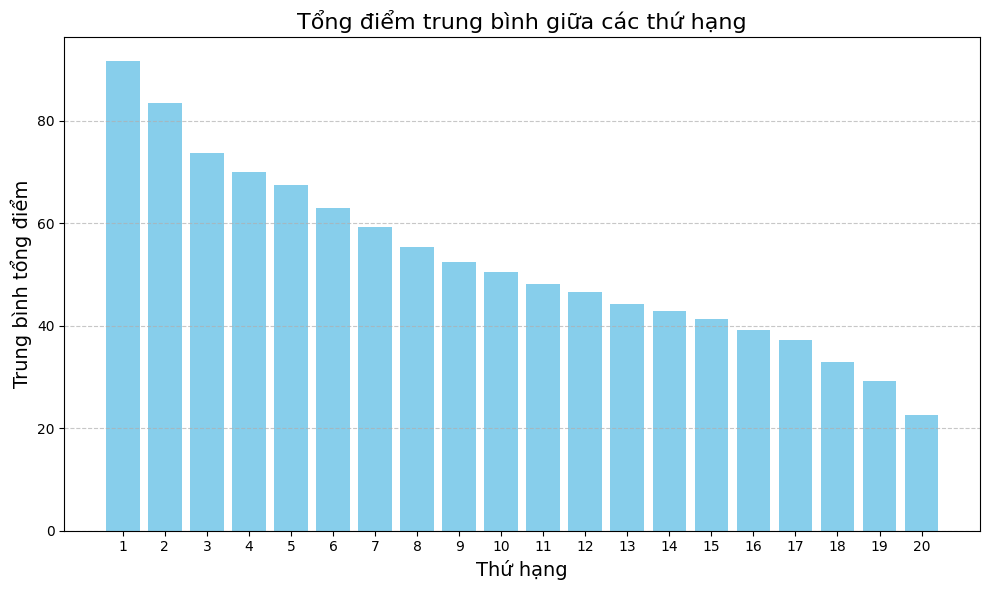

In [69]:
plt.figure(figsize=(10, 6))
plt.bar(average_points_by_rank_sorted["Ranking"], average_points_by_rank_sorted["Total_Points"], color="skyblue")
plt.title("Tổng điểm trung bình giữa các thứ hạng", fontsize=16)
plt.xlabel("Thứ hạng", fontsize=14)
plt.ylabel("Trung bình tổng điểm", fontsize=14)
plt.xticks(average_points_by_rank_sorted["Ranking"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Nhận xét**
- Tổng điểm trung bình của các đội giảm dần theo thứ hạng từ 1 đến 20. Đội đứng hạng 1 có tổng điểm trung bình cao nhất là 91.7 điểm, trong khi đội đứng hạng 20 có tổng điểm trung bình thấp nhất là 22.5 điểm.
- Các đội ở hạng cao (1-5) có tổng điểm trung bình từ khoảng 67.5 đến 91.7, trong khi các đội ở hạng thấp (16-20) có tổng điểm trung bình dao động từ 22.5
- Các đội ở vị trí giữa bảng vẫn có sự cạnh tranh tương đối gần gũi, nhưng vẫn có sự chênh lệch đáng kể so với các đội xếp hạng cao

**Kết luận: Dữ liệu cho thấy mối quan hệ chặt chẽ giữa thứ hạng và tổng điểm trung bình của các đội. Các đội đứng đầu có tổng điểm rất cao, trong khi các đội ở cuối bảng có điểm thấp, điều này là một chỉ báo rõ ràng về sự phân chia hiệu suất giữa các đội bóng trong giải đấu. Tóm lại, giá trị 'Total Points' này có thể được xem là 1 trong những thang đó chính và cực kì quan trọng tác động đến thứ hạng cuối cùng của mùa giải.**






